# Credit Risk Modeling – Feature Engineering & Modeling

This notebook is part of an end-to-end credit risk modeling project completed
during my Data Science Internship at HDFC Capital Advisors Ltd.

⚠️ Note: Due to data confidentiality, raw datasets are not included.
The notebook demonstrates methodology, feature engineering logic,
modeling approach, and evaluation techniques.

In [1]:
import pandas as pd

# Load Dataset

##### TRAIN SET

In [2]:
train = pd.read_csv("./data/df_train.csv")

In [3]:
train = train.drop(columns='accList_loan_status')

In [4]:
df_train = train.copy()

In [5]:
df_train["TARGET"].value_counts()

TARGET
0    205805
1     17185
Name: count, dtype: int64

In [6]:
og_flag = train[["uid","TARGET"]].copy()

In [7]:
train.shape

(222990, 160)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222990 entries, 0 to 222989
Columns: 160 entries, uid to accList_most_frequent_credit_type
dtypes: float64(104), int64(54), object(2)
memory usage: 272.2+ MB


In [9]:

train[train.select_dtypes(include=['object']).columns]

,uid,accList_most_frequent_credit_type
0,XDA69787158,Credit card
1,BSE47789733,Consumer credit
2,NTJ92213825,Consumer credit
3,TCQ47571695,Consumer credit
4,FZI10689602,Consumer credit
...,...,...
222985,SWK95839200,Consumer credit
222986,NDO00278120,Consumer credit
222987,LDY78194712,Consumer credit
222988,EVH98380736,Mortgage


In [10]:
x = train.columns.to_list()
x

['uid',
 'TARGET',
 'enqList_Avg_amount_enquired',
 'enqList_max_amount_enquired',
 'enqList_min_amount_enquired',
 'enqList_total_enquiries_per_customer',
 'enqList_unique_enquiry_types_per_customer',
 'enqList_Another type of loan_total_enquiries',
 'enqList_Car loan_total_enquiries',
 'enqList_Cash loan (non-earmarked)_total_enquiries',
 'enqList_Cash loans_total_enquiries',
 'enqList_Consumer credit_total_enquiries',
 'enqList_Credit card_total_enquiries',
 'enqList_Interbank credit_total_enquiries',
 'enqList_Loan for business development_total_enquiries',
 'enqList_Loan for purchase of shares (margin lending)_total_enquiries',
 'enqList_Loan for the purchase of equipment_total_enquiries',
 'enqList_Loan for working capital replenishment_total_enquiries',
 'enqList_Microloan_total_enquiries',
 'enqList_Mobile operator loan_total_enquiries',
 'enqList_Mortgage_total_enquiries',
 'enqList_Real estate loan_total_enquiries',
 'enqList_Revolving loans_total_enquiries',
 'enqList_Unknow

##### TEST SET

In [11]:
test = pd.read_csv("/Users/aaniaadap/Desktop/HDFC Internship/df_test.csv")

In [12]:
test.shape

(39417, 151)

In [13]:
test_target=pd.read_csv('/Users/aaniaadap/Desktop/HDFC Internship/Monsoon Project/senior_ds_test/data/test/target.csv')

In [14]:
test=test.merge(test_target,on='uid',how='inner')

In [15]:
test = test.drop(columns="accList_loan_status")

In [16]:
df_test = test.copy()

In [17]:
test.shape

(39417, 151)

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39417 entries, 0 to 39416
Columns: 151 entries, uid to TARGET
dtypes: float64(95), int64(54), object(2)
memory usage: 45.4+ MB


In [19]:
test.select_dtypes(include=['object']).columns

Index(['uid', 'accList_most_frequent_credit_type'], dtype='object')

In [20]:
y = test.columns.to_list()
y

['uid',
 'enqList_Avg_amount_enquired',
 'enqList_max_amount_enquired',
 'enqList_min_amount_enquired',
 'enqList_total_enquiries_per_customer',
 'enqList_unique_enquiry_types_per_customer',
 'enqList_Another type of loan_total_enquiries',
 'enqList_Car loan_total_enquiries',
 'enqList_Cash loan (non-earmarked)_total_enquiries',
 'enqList_Cash loans_total_enquiries',
 'enqList_Consumer credit_total_enquiries',
 'enqList_Credit card_total_enquiries',
 'enqList_Interbank credit_total_enquiries',
 'enqList_Loan for business development_total_enquiries',
 'enqList_Loan for purchase of shares (margin lending)_total_enquiries',
 'enqList_Loan for the purchase of equipment_total_enquiries',
 'enqList_Loan for working capital replenishment_total_enquiries',
 'enqList_Microloan_total_enquiries',
 'enqList_Mobile operator loan_total_enquiries',
 'enqList_Mortgage_total_enquiries',
 'enqList_Real estate loan_total_enquiries',
 'enqList_Revolving loans_total_enquiries',
 'enqList_Unknown type of l

In [21]:
set(x) - set(y)

{'accList_Interbank credit_mean_loan',
 'accList_Interbank credit_median_loan',
 'accList_Interbank credit_total_loan',
 'accList_Loan for purchase of shares (margin lending)_mean_loan',
 'accList_Loan for purchase of shares (margin lending)_median_loan',
 'accList_Loan for purchase of shares (margin lending)_total_loan',
 'accList_Mobile operator loan_mean_loan',
 'accList_Mobile operator loan_median_loan',
 'accList_Mobile operator loan_total_loan'}

In [22]:
missing_cols = set(x) - set(y)
for col in missing_cols:
    test[col] = 0

In [33]:
set(train.columns.to_list()) - set(test.columns.to_list())

set()

In [34]:
test.shape

(39417, 159)


## DISTRIBUTION

In [35]:
train.describe()

,TARGET,enqList_Avg_amount_enquired,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer,enqList_Another type of loan_total_enquiries,enqList_Car loan_total_enquiries,enqList_Cash loan (non-earmarked)_total_enquiries,enqList_Cash loans_total_enquiries,...,accList_Loan for business development_total_loan,accList_Loan for purchase of shares (margin lending)_total_loan,accList_Loan for the purchase of equipment_total_loan,accList_Loan for working capital replenishment_total_loan,accList_Microloan_total_loan,accList_Mobile operator loan_total_loan,accList_Mortgage_total_loan,accList_Real estate loan_total_loan,accList_Unknown type of loan_total_loan,accList_most_frequent_credit_type
count,222990.000000,222990.000000,222990.000000,222990.000000,222990.000000,222990.000000,222990.000000,222990.000000,222990.000000,222990.000000,...,2.229900e+05,2.229900e+05,2.229900e+05,2.229900e+05,2.229900e+05,2.229900e+05,2.229900e+05,2.229900e+05,2.229900e+05,222990.000000
mean,0.077066,115896.117343,177397.837329,54448.453016,7.310978,5.099610,0.379228,0.379071,0.379483,1.162079,...,9.838802e+03,5.981434e+01,3.344452e+02,2.429403e+03,2.003448e+03,6.659491e+01,3.194980e+05,4.898941e+02,7.640139e+02,2.178905
std,0.266697,60426.363565,89750.115652,61876.382989,6.999034,3.703636,0.702597,0.703355,0.703789,1.522783,...,5.541778e+05,1.890281e+04,5.649548e+04,2.687336e+05,4.126686e+04,3.144733e+04,1.873359e+06,8.972913e+04,5.277017e+04,0.697420
min,0.000000,1057.000000,1057.000000,1007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,86250.000000,141000.000000,14000.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000
50%,0.000000,104666.670000,179000.000000,31000.000000,5.000000,4.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000
75%,0.000000,127230.770000,194000.000000,74000.000000,10.000000,8.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000
max,1.000000,499960.000000,499995.000000,499960.000000,69.000000,17.000000,9.000000,9.000000,8.000000,15.000000,...,1.723050e+08,8.298000e+06,1.732500e+07,1.102500e+08,4.725000e+06,1.485000e+07,1.915112e+08,3.544695e+07,9.000000e+06,10.000000


In [ ]:
test.describe()

## PREPROCESSING

In [36]:
# Drop the uid column as it is likely not useful for model training
train = train.drop(columns=['uid'])
test = test.drop(columns=['uid'])

KeyError: "['uid'] not found in axis"

In [37]:
train[['accList_most_frequent_credit_type']]

,accList_most_frequent_credit_type
0,3
1,2
2,2
3,2
4,2
...,...
222985,2
222986,2
222987,2
222988,8


In [38]:
test[['accList_most_frequent_credit_type']]

,accList_most_frequent_credit_type
0,2
1,3
2,2
3,2
4,2
...,...
39412,2
39413,2
39414,3
39415,2


## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['accList_most_frequent_credit_type']

# Combine train and test sets for fitting label encoder
combined_data = pd.concat([train[categorical_columns], test[categorical_columns]])

combined_data = combined_data.astype(str)

label_encoder = LabelEncoder()
for col in categorical_columns:
    label_encoder.fit(combined_data[col]) 
    train[col] = label_encoder.transform(train[col])
    test[col] = label_encoder.transform(test[col])


## Scaling the Data

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_cols = train.drop(columns=['TARGET']).columns
numerical_cols_test = test.drop(columns=["TARGET"]).columns

scaler.fit_transform(train[numerical_cols])

scaled_train = scaler.transform(train[numerical_cols])
scaled_test = scaler.transform(test[numerical_cols])

# Convert the scaled data back to a DataFrame
train_scaled = pd.DataFrame(scaled_train, columns=numerical_cols)
train_scaled['TARGET'] = train['TARGET']

test_scaled = pd.DataFrame(scaled_test, columns=numerical_cols)
test_scaled["TARGET"]=test["TARGET"]

In [43]:
print("Scaled Training Data:")
train_scaled


Scaled Training Data:


,enqList_Avg_amount_enquired,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer,enqList_Another type of loan_total_enquiries,enqList_Car loan_total_enquiries,enqList_Cash loan (non-earmarked)_total_enquiries,enqList_Cash loans_total_enquiries,enqList_Consumer credit_total_enquiries,...,accList_Loan for purchase of shares (margin lending)_total_loan,accList_Loan for the purchase of equipment_total_loan,accList_Loan for working capital replenishment_total_loan,accList_Microloan_total_loan,accList_Mobile operator loan_total_loan,accList_Mortgage_total_loan,accList_Real estate loan_total_loan,accList_Unknown type of loan_total_loan,accList_most_frequent_credit_type,TARGET
0,0.269477,0.330588,0.208422,0.014706,0.0625,0.000000,0.000000,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.3,0
1,0.287183,0.300524,0.262536,0.029412,0.1250,0.000000,0.111111,0.000,0.066667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
2,0.239411,0.332592,0.014015,0.044118,0.1250,0.000000,0.000000,0.000,0.066667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
3,0.294532,0.294512,0.294603,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
4,0.169480,0.362656,0.018024,0.250000,0.5625,0.000000,0.000000,0.375,0.200000,0.375,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222985,0.726214,0.938088,0.485078,0.117647,0.3125,0.000000,0.000000,0.000,0.000000,0.250,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
222986,0.177475,0.342614,0.046082,0.205882,0.6875,0.222222,0.000000,0.000,0.133333,0.125,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
222987,0.216592,0.378690,0.022032,0.750000,1.0000,0.333333,0.222222,0.750,0.733333,0.125,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
222988,0.411250,0.411221,0.411309,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.051694,0.0,0.0,0.8,0


limit_output extension: Maximum message size of 10000 exceeded with 11224 characters

In [44]:
print("\nScaled Test Data:")
test_scaled


Scaled Test Data:


,enqList_Avg_amount_enquired,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer,enqList_Another type of loan_total_enquiries,enqList_Car loan_total_enquiries,enqList_Cash loan (non-earmarked)_total_enquiries,enqList_Cash loans_total_enquiries,enqList_Consumer credit_total_enquiries,...,accList_Loan for purchase of shares (margin lending)_total_loan,accList_Loan for the purchase of equipment_total_loan,accList_Loan for working capital replenishment_total_loan,accList_Microloan_total_loan,accList_Mobile operator loan_total_loan,accList_Mortgage_total_loan,accList_Real estate loan_total_loan,accList_Unknown type of loan_total_loan,accList_most_frequent_credit_type,TARGET
0,0.257451,0.366665,0.026041,0.102941,0.3125,0.000000,0.000000,0.000,0.066667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.034071,0.0,0.0,0.2,0
1,0.366691,0.366665,0.366754,0.000000,0.0000,0.000000,0.111111,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.3,0
2,0.374708,0.374682,0.374771,0.000000,0.0000,0.000000,0.000000,0.000,0.066667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
3,0.190017,0.382699,0.022032,0.294118,0.6250,0.000000,0.333333,0.375,0.133333,0.250,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
4,0.221372,0.338605,0.164330,0.073529,0.3125,0.000000,0.000000,0.000,0.066667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39412,0.253999,0.396729,0.132263,0.117647,0.4375,0.000000,0.000000,0.000,0.000000,0.125,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
39413,0.100106,0.100099,0.100196,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.125,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
39414,0.120550,0.242401,0.044078,0.058824,0.1875,0.222222,0.000000,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.3,0
39415,0.184577,0.298520,0.012011,0.088235,0.3750,0.111111,0.000000,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,1


limit_output extension: Maximum message size of 10000 exceeded with 11040 characters

# Feature Selection

In [45]:
x = train_scaled.drop(columns='TARGET')
y = train_scaled["TARGET"]

In [46]:
test_x = test_scaled.drop(columns='TARGET')
test_y = test_scaled["TARGET"]

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['accList_most_frequent_credit_type']
numerical_columns = x_train.columns.difference(categorical_columns)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', SimpleImputer(strategy='mean'), numerical_columns)
    ]
)
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)
test_x = preprocessor.transform(test_x)

In [50]:
feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
feature_names_num = numerical_columns.tolist()

feature_names = np.concatenate([feature_names_cat, feature_names_num])

x_train_df = pd.DataFrame(x_train, columns=feature_names)
x_test_df = pd.DataFrame(x_test, columns=feature_names)
test_x_df = pd.DataFrame(test_x, columns=feature_names)

In [51]:
print("Transformed Training DataFrame:")
(x_train_df.head())


Transformed Training DataFrame:


,accList_most_frequent_credit_type_0.0,accList_most_frequent_credit_type_0.1,accList_most_frequent_credit_type_0.2,accList_most_frequent_credit_type_0.30000000000000004,accList_most_frequent_credit_type_0.4,accList_most_frequent_credit_type_0.5,accList_most_frequent_credit_type_0.6000000000000001,accList_most_frequent_credit_type_0.7000000000000001,accList_most_frequent_credit_type_0.8,accList_most_frequent_credit_type_0.9,...,enqList_Unknown type of loan_total_enquiry_amt,enqList_enquiries_last_1_month,enqList_enquiries_last_3_months,enqList_enquiries_last_6_months,enqList_enquiries_last_9_months,enqList_enquiries_last_year,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.138787,0.1,0.095238,0.121212,0.095238,0.075472,0.884553,0.043826,0.117647,0.50
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.030303,0.023810,0.018868,0.096090,0.096187,0.000000,0.00
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.030303,0.023810,0.018868,0.328584,0.328674,0.000000,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.080151,0.1,0.095238,0.060606,0.071429,0.056604,0.326580,0.038066,0.073529,0.25
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.018868,0.332592,0.332683,0.000000,0.00


In [52]:

print("\nTransformed Test DataFrame:")
(x_test_df.head())


Transformed Test DataFrame:


,accList_most_frequent_credit_type_0.0,accList_most_frequent_credit_type_0.1,accList_most_frequent_credit_type_0.2,accList_most_frequent_credit_type_0.30000000000000004,accList_most_frequent_credit_type_0.4,accList_most_frequent_credit_type_0.5,accList_most_frequent_credit_type_0.6000000000000001,accList_most_frequent_credit_type_0.7000000000000001,accList_most_frequent_credit_type_0.8,accList_most_frequent_credit_type_0.9,...,enqList_Unknown type of loan_total_enquiry_amt,enqList_enquiries_last_1_month,enqList_enquiries_last_3_months,enqList_enquiries_last_6_months,enqList_enquiries_last_9_months,enqList_enquiries_last_year,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.1,0.047619,0.060606,0.047619,0.037736,0.376686,0.334687,0.029412,0.1250
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015150,0.0,0.000000,0.000000,0.023810,0.018868,0.060013,0.060112,0.000000,0.0000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.080151,0.1,0.095238,0.181818,0.142857,0.150943,0.370673,0.028045,0.176471,0.5000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010263,0.2,0.142857,0.151515,0.166667,0.150943,0.352635,0.020028,0.132353,0.4375
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.047619,0.030303,0.023810,0.037736,0.951385,0.213822,0.029412,0.1250


In [53]:
print("\nOriginal Transformed Test DataFrame:")
(test_x_df.head())


Original Transformed Test DataFrame:


,accList_most_frequent_credit_type_0.0,accList_most_frequent_credit_type_0.1,accList_most_frequent_credit_type_0.2,accList_most_frequent_credit_type_0.30000000000000004,accList_most_frequent_credit_type_0.4,accList_most_frequent_credit_type_0.5,accList_most_frequent_credit_type_0.6000000000000001,accList_most_frequent_credit_type_0.7000000000000001,accList_most_frequent_credit_type_0.8,accList_most_frequent_credit_type_0.9,...,enqList_Unknown type of loan_total_enquiry_amt,enqList_enquiries_last_1_month,enqList_enquiries_last_3_months,enqList_enquiries_last_6_months,enqList_enquiries_last_9_months,enqList_enquiries_last_year,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006842,0.0,0.000000,0.030303,0.071429,0.094340,0.366665,0.026041,0.102941,0.3125
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.366665,0.366754,0.000000,0.0000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.374682,0.374771,0.000000,0.0000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.1,0.190476,0.212121,0.238095,0.226415,0.382699,0.022032,0.294118,0.6250
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041053,0.0,0.095238,0.121212,0.119048,0.094340,0.338605,0.164330,0.073529,0.3125


## RFE

In [54]:
import lightgbm as lgb
from sklearn.feature_selection import RFE

lgb_model = lgb.LGBMClassifier()

rfe = RFE(estimator=lgb_model, n_features_to_select=50, step=5)

rfe.fit(x_train_df, y_train)


X_train_rfe = rfe.transform(x_train_df)
X_test_rfe = rfe.transform(x_test_df)
test_x_rfe = rfe.transform(test_x_df)

[LightGBM] [Info] Number of positive: 15493, number of negative: 185198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.205334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25016
[LightGBM] [Info] Number of data points in the train set: 200691, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077198 -> initscore=-2.481037
[LightGBM] [Info] Start training from score -2.481037
[LightGBM] [Info] Number of positive: 15493, number of negative: 185198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.221143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25014
[LightGBM] [Info] Number of data points in the train set: 200691, number of used features: 146
[LightGBM]

[LightGBM] [Info] Number of positive: 15493, number of negative: 185198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20151
[LightGBM] [Info] Number of data points in the train set: 200691, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077198 -> initscore=-2.481037
[LightGBM] [Info] Start training from score -2.481037
[LightGBM] [Info] Number of positive: 15493, number of negative: 185198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.121311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18894
[LightGBM] [Info] Number of data points in the train set: 200691, number of used features: 88
[LightGBM] [

limit_output extension: Maximum message size of 10000 exceeded with 10317 characters

In [55]:
# Print selected features
selected_features = x_train_df.columns[rfe.support_].tolist()
print("Selected Features:")
for feature in selected_features:
    print(f"- {feature}")

# Optionally, you can also get dropped features
dropped_features = x_train_df.columns[~rfe.support_].tolist()
print("\nDropped Features:")
for feature in dropped_features:
    print(f"- {feature}")


Selected Features:
- accList_Consumer credit_mean_loan
- accList_Consumer credit_median_loan
- accList_Consumer credit_total_loan
- accList_Credit card_mean_loan
- accList_Credit card_median_loan
- accList_Credit card_total_loan
- accList_Microloan_mean_loan
- accList_avg_consecutive_late_payments
- accList_avg_loan_amount
- accList_avg_ontime_payments
- accList_avg_payments
- accList_earliest_acc_day
- accList_earliest_acc_month
- accList_earliest_acc_year
- accList_latest_acc_day
- accList_latest_acc_month
- accList_latest_acc_year
- accList_max_DPD
- accList_max_duration_months
- accList_max_loan_amt
- accList_max_payments
- accList_mean_duration_months
- accList_median_loan_amount
- accList_median_payments
- accList_min_duration_months
- accList_min_loan_amt
- accList_min_payments
- accList_total_duration_months
- enqList_Another type of loan_mean_enquiry_amt
- enqList_Avg_amount_enquired
- enqList_Car loan_mean_enquiry_amt
- enqList_Car loan_total_enquiry_amt
- enqList_Cash loan (

In [56]:
feature_names = x_train_df.columns

# Print feature rankings and names
print("Feature Rankings:")
for rank, name in sorted(zip(rfe.ranking_, feature_names)):
    print(f"Rank {rank}: {name}")

Feature Rankings:
Rank 1: accList_Consumer credit_mean_loan
Rank 1: accList_Consumer credit_median_loan
Rank 1: accList_Consumer credit_total_loan
Rank 1: accList_Credit card_mean_loan
Rank 1: accList_Credit card_median_loan
Rank 1: accList_Credit card_total_loan
Rank 1: accList_Microloan_mean_loan
Rank 1: accList_avg_consecutive_late_payments
Rank 1: accList_avg_loan_amount
Rank 1: accList_avg_ontime_payments
Rank 1: accList_avg_payments
Rank 1: accList_earliest_acc_day
Rank 1: accList_earliest_acc_month
Rank 1: accList_earliest_acc_year
Rank 1: accList_latest_acc_day
Rank 1: accList_latest_acc_month
Rank 1: accList_latest_acc_year
Rank 1: accList_max_DPD
Rank 1: accList_max_duration_months
Rank 1: accList_max_loan_amt
Rank 1: accList_max_payments
Rank 1: accList_mean_duration_months
Rank 1: accList_median_loan_amount
Rank 1: accList_median_payments
Rank 1: accList_min_duration_months
Rank 1: accList_min_loan_amt
Rank 1: accList_min_payments
Rank 1: accList_total_duration_months
Rank 

In [57]:
feature_rankings = rfe.ranking_

# Get list of feature names
feature_names = x_train_df.columns

# Create a DataFrame to store feature names and their ranks
feature_ranks_df = pd.DataFrame({
    'Feature': feature_names,
    'Rank': feature_rankings
})

# Filter features where rank is less than or equal to 5
selected_features_top5 = feature_ranks_df[feature_ranks_df['Rank'] <= 5]

# Sort by rank to maintain the order
selected_features_top5 = selected_features_top5.sort_values(by='Rank')

# Extract the feature names with ranks up to 5
selected_feature_names = selected_features_top5['Feature'].tolist()

# Display selected feature names and their ranks
print("Selected Features (up to Rank 5):")
selected_features_top5

Selected Features (up to Rank 5):


,Feature,Rank
20,accList_Consumer credit_mean_loan,1
88,accList_min_payments,1
89,accList_total_duration_months,1
90,enqList_Another type of loan_mean_enquiry_amt,1
166,enqList_total_enquiries_per_customer,1
...,...,...
49,accList_Mortgage_total_loan,5
134,enqList_Loan for working capital replenishment...,5
115,enqList_Interbank credit_mean_enquiry_amt,5
114,enqList_Credit card_total_enquiry_amt,5


In [58]:
len(selected_feature_names)

68

# MODELS

In [59]:
x_train = x_train_df[selected_feature_names]
x_test = x_test_df[selected_feature_names]
test_x = test_x_df[selected_feature_names]

## LGBM

In [ ]:
import lightgbm as lgb

In [60]:
lgb_model = lgb_model = lgb.LGBMClassifier(
    objective='binary',         
    metric='auc',               
    random_state=42             
)

### Grid Search CV

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.005, 0.001],
    'n_estimators': [200, 300],
    'num_leaves': [20, 30],
    'max_depth': [10, 20],
    'reg_lambda': [1, 10],
    'reg_alpha': [1, 10],
}

grid_search_lgbm = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=3, n_jobs=-1)
grid_search_lgbm.fit(x_train, y_train)

pd.DataFrame(grid_search_lgbm.cv_results_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12395, number of negative: 148158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.269598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14000
[LightGBM] [Info] Number of data points in the train set: 160553, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077202 -> initscore=-2.480986
[LightGBM] [Info] Start training from score -2.480986
[CV 2/5] END learning_rate=0.005, max_depth=10, n_estimators=200, num_leaves=20, reg_alpha=1, reg_lambda=1;, score=0.632 total time= 1.6min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12394, number of negative: 148159
[Ligh

limit_output extension: Maximum message size of 10000 exceeded with 16209 characters

In [67]:
pd.DataFrame(grid_search_lgbm.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_num_leaves,param_reg_alpha,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,93.731068,0.344672,2.209049,0.362308,0.005,10,200,20,1,1,"{'learning_rate': 0.005, 'max_depth': 10, 'n_e...",0.630445,0.631727,0.626823,0.632287,0.630592,0.630375,0.001905,25
1,80.036620,21.455733,1.884442,0.677517,0.005,10,200,20,1,10,"{'learning_rate': 0.005, 'max_depth': 10, 'n_e...",0.630797,0.631338,0.626837,0.632429,0.630257,0.630332,0.001889,27
2,85.453335,12.130494,1.731030,0.489999,0.005,10,200,20,10,1,"{'learning_rate': 0.005, 'max_depth': 10, 'n_e...",0.629967,0.630107,0.625327,0.631376,0.629125,0.629180,0.002057,29
3,98.505211,13.353510,1.186447,0.129506,0.005,10,200,20,10,10,"{'learning_rate': 0.005, 'max_depth': 10, 'n_e...",0.629821,0.629502,0.625096,0.631104,0.628366,0.628778,0.002037,31
4,196.404508,6.776724,0.878601,0.310741,0.005,10,200,30,1,1,"{'learning_rate': 0.005, 'max_depth': 10, 'n_e...",0.634185,0.634551,0.629926,0.635383,0.636001,0.634009,0.002138,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,48.287310,1.079772,0.219883,0.018091,0.001,20,300,20,10,10,"{'learning_rate': 0.001, 'max_depth': 20, 'n_e...",0.616045,0.617354,0.614973,0.618705,0.616506,0.616717,0.001257,53
60,64.260592,0.751098,0.241420,0.014405,0.001,20,300,30,1,1,"{'learning_rate': 0.001, 'max_depth': 20, 'n_e...",0.620279,0.621210,0.618485,0.622204,0.621469,0.620730,0.001280,35
61,62.917302,0.173348,0.254232,0.026917,0.001,20,300,30,1,10,"{'learning_rate': 0.001, 'max_depth': 20, 'n_e...",0.620776,0.620692,0.619261,0.622590,0.621490,0.620962,0.001089,33
62,62.800624,0.518876,0.258943,0.029706,0.001,20,300,30,10,1,"{'learning_rate': 0.001, 'max_depth': 20, 'n_e...",0.620650,0.619255,0.617674,0.621838,0.619243,0.619732,0.001413,38


##### IMPORTANT FEATURES

In [96]:
feature_importance_lgb = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': lgb_model.feature_importances_
})

# Sort features by importance
feature_importance_lgb = feature_importance_lgb.sort_values(by='Importance', ascending=False)

print(feature_importance_lgb)

                                              Feature  Importance
4                enqList_total_enquiries_per_customer         198
20                        enqList_enquiries_last_year         141
31                     accList_Credit card_total_loan         116
11                               accList_min_loan_amt         112
21                        enqList_max_amount_enquired         102
..                                                ...         ...
53     enqList_Mobile operator loan_total_enquiry_amt          18
64  enqList_Loan for working capital replenishment...          18
7   enqList_Cash loan (non-earmarked)_mean_enquiry...          17
63                        accList_Mortgage_total_loan          17
66              enqList_Credit card_total_enquiry_amt          17

[68 rows x 2 columns]


##### Prediction Info

In [68]:
y_pred_train_lgbm = grid_search_lgbm.best_estimator_.predict(x_train)
y_pred_test_lgbm = grid_search_lgbm.best_estimator_.predict(x_test)
y_pred_og_test_lgbm = grid_search_lgbm.best_estimator_.predict(test_x)

y_pred_train_lgbm_proba = grid_search_lgbm.best_estimator_.predict_proba(x_train)
y_pred_test_lgbm_proba = grid_search_lgbm.best_estimator_.predict_proba(x_test)
y_pred_og_test_lgbm_proba = grid_search_lgbm.best_estimator_.predict_proba(test_x)

print("Predicted class labels for training data:", y_pred_train_lgbm[:5])
print("Predicted probabilities for training data:\n", y_pred_train_lgbm_proba[:5])

print("Predicted class labels for test data:", y_pred_og_test_lgbm[:5])
print("Predicted probabilities for test data:\n", y_pred_og_test_lgbm_proba[:5])


print("Predicted class labels for test data:", y_pred_test_lgbm[:5])

print("Predicted probabilities for test data:\n", y_pred_test_lgbm_proba[:5])

Predicted class labels for training data: [0 0 0 0 0]
Predicted probabilities for training data:
 [[0.93325141 0.06674859]
 [0.94418349 0.05581651]
 [0.93481502 0.06518498]
 [0.74921748 0.25078252]
 [0.93696266 0.06303734]]
Predicted class labels for test data: [0 0 0 0 0]
Predicted probabilities for test data:
 [[0.9398924  0.0601076 ]
 [0.88586871 0.11413129]
 [0.94612376 0.05387624]
 [0.93234009 0.06765991]
 [0.93372719 0.06627281]]
Predicted class labels for test data: [0 0 0 0 0]
Predicted probabilities for test data:
 [[0.9135685  0.0864315 ]
 [0.88135849 0.11864151]
 [0.89475474 0.10524526]
 [0.93861305 0.06138695]
 [0.91336183 0.08663817]]


In [69]:
best_params = grid_search_lgbm.best_params_
best_score = grid_search_lgbm.best_score_

In [70]:
print("Best Parameters:", best_params)
print("Best ROC-AUC Score:", best_score)

Best Parameters: {'learning_rate': 0.005, 'max_depth': 20, 'n_estimators': 300, 'num_leaves': 30, 'reg_alpha': 1, 'reg_lambda': 1}
Best ROC-AUC Score: 0.6420503174180494


##### AUC_ROC SCORE

In [72]:
from sklearn.metrics import roc_auc_score

y_train_prob_lgb = y_pred_train_lgbm_proba[:, 1]
y_test_prob_lgb = y_pred_test_lgbm_proba[:, 1]
og_y_test_prob_lgbm = y_pred_og_test_lgbm_proba[:,1]

train_auc_lgbm = roc_auc_score(y_train, y_train_prob_lgb)
test_auc_lgbm = roc_auc_score(y_test, y_test_prob_lgb)
og_test_auc_lgbm = roc_auc_score(test_y,og_y_test_prob_lgbm )

print(f"Train AUC-ROC: {train_auc_lgbm}")
print(f"Test AUC-ROC: {test_auc_lgbm}")
print(f"Original Test Dataset AUC-ROC: {og_test_auc_lgbm}")

Train AUC-ROC: 0.666686695668577
Test AUC-ROC: 0.6427436607473809
Original Test Dataset AUC-ROC: 0.6427396121144695


##### GINI COEFFICIENT

In [97]:
# gini_coefficient = 2 * roc_auc - 1
gini_train = 2 * train_auc_lgbm - 1
gini_test =  2 * test_auc_lgbm - 1
gini_og_test = 2 * og_test_auc_lgbm - 1

In [98]:
print(f"Gini Coefficient for Train: {gini_train}")
print(f"Gini Coefficient for Test Split: {gini_test}")
print(f"Gini Coefficient for Original Test Dataset: {gini_og_test}")

Gini Coefficient for Train: 0.33337339133715393
Gini Coefficient for Test Split: 0.28548732149476175
Gini Coefficient for Original Test Dataset: 0.285479224228939


##### KS Statistic

In [101]:
def ks_statistic(y_true, y_pred_proba):
    data = pd.DataFrame({'y_true': y_true, 'y_pred_proba': y_pred_proba})
    data.sort_values(by='y_pred_proba', ascending=False, inplace=True)
    data['cum_event_rate'] = data['y_true'].cumsum() / data['y_true'].sum()
    data['cum_non_event_rate'] = (1 - data['y_true']).cumsum() / (1 - data['y_true']).sum()
    data['ks'] = np.abs(data['cum_event_rate'] - data['cum_non_event_rate'])
    ks_stat = data['ks'].max()
    return ks_stat

ks_stat_train = ks_statistic(y_train,y_train_prob_lgb)
ks_stat_test_split = ks_statistic(y_test,y_test_prob_lgb)
ks_stat_test_og = ks_statistic(test_y,og_y_test_prob_lgbm)

In [102]:
print(f"KS Statistic for Train: {ks_stat_train:.4f}")
print(f"KS Statistic for Test Split: {ks_stat_test_split:.4f}")
print(f"KS Statistic for Original Test Dataset: {ks_stat_test_og:.4f}")

KS Statistic for Train: 0.2394
KS Statistic for Test Split: 0.2068
KS Statistic for Original Test Dataset: 0.2115


# PLOTS 

## AUC-ROC 

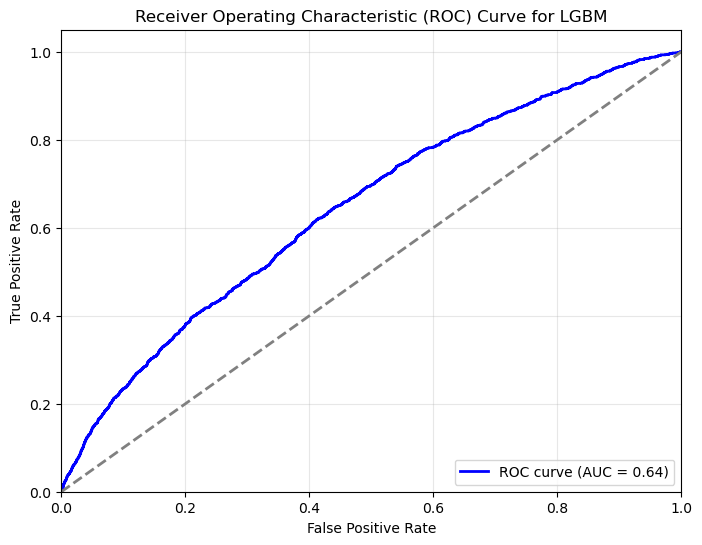

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_lgb)

# Step 3: Compute the AUC score
auc_score = roc_auc_score(y_test, y_test_prob_lgb)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LGBM')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## CONFUSION MATRIX

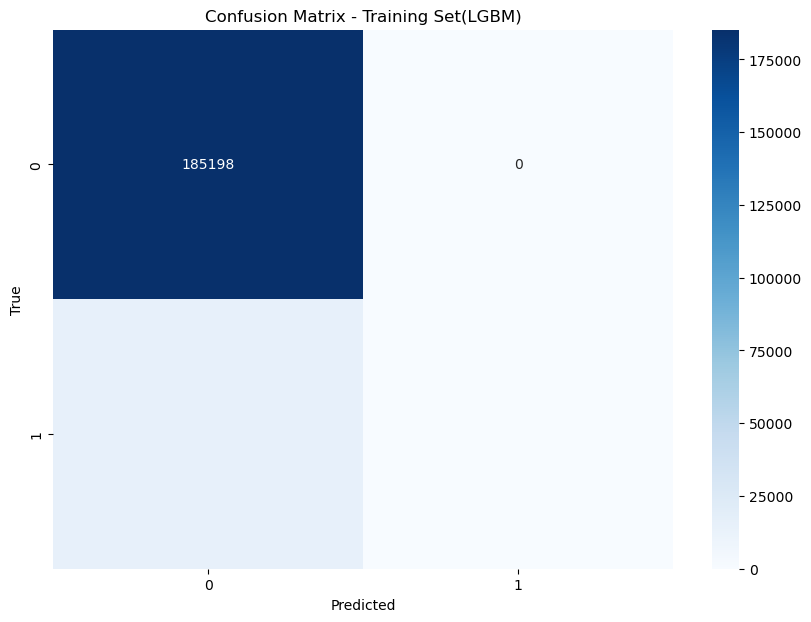

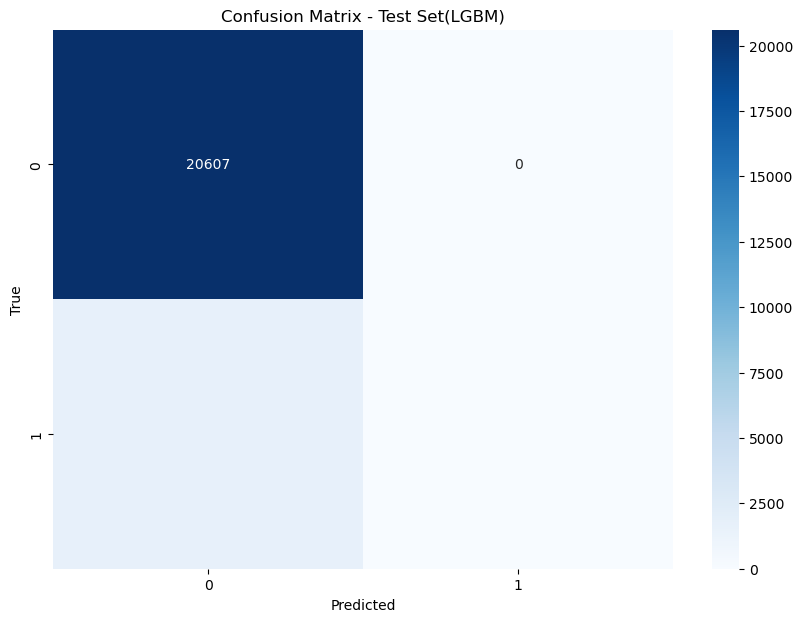

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, y_pred_train_lgbm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training Set(LGBM)')
plt.show()


cm_test = confusion_matrix(y_test, y_pred_test_lgbm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set(LGBM)')
plt.show()

In [ ]:
Best Parameters: {'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 300, 'num_leaves': 30}
Train AUC-ROC: 0.6981864819067345
Test AUC-ROC: 0.656668514830222
    
Best Parameters: {'learning_rate': 0.005, 'max_depth': 20, 'n_estimators': 300, 'num_leaves': 30, 'reg_alpha': 1, 'reg_lambda': 1}
Train AUC-ROC: 0.666686695668577
Test AUC-ROC: 0.6427436607473809

## DECILE

In [86]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming logreg_model, test_x, and test_y are already defined
test_y_prob = lgb_model.predict_proba(test_x)[:, 1]
test_y = test_y.reset_index(drop=True)

# Create a DataFrame with predicted probabilities and actual labels
df = pd.DataFrame({
    'predicted_prob': og_y_test_prob_lgbm,
    'actual': test_y
})

# Rank the data by predicted probabilities in descending order
df = df.sort_values(by='predicted_prob', ascending=False).reset_index(drop=True)

# Calculate decile groups (1 to 10)
df['decile'] = pd.qcut(df.index, 10, labels=False) + 1  # 1-based deciles


In [87]:
df['avg_baseline'] = df['actual'].mean()

In [88]:
avg_decile = df.groupby('decile')['actual'].mean()

# Merge the calculated avg_decile back to the original DataFrame df
df = df.merge(avg_decile, on='decile', suffixes=('', '_decile'))

# Rename the column to 'avg_decile' for clarity
df.rename(columns={'actual_decile': 'avg_decile'}, inplace=True)



In [89]:
df['dec_lift'] = df['avg_decile'] / df['avg_baseline']

In [93]:
df_sorted = df.sort_values(by='decile')

In [94]:
df_sorted

,predicted_prob,actual,decile,avg_baseline,avg_decile,dec_lift
0,0.292266,1,1,0.078494,0.176306,2.246112
2620,0.114670,0,1,0.078494,0.176306,2.246112
2621,0.114659,0,1,0.078494,0.176306,2.246112
2622,0.114654,0,1,0.078494,0.176306,2.246112
2623,0.114636,0,1,0.078494,0.176306,2.246112
...,...,...,...,...,...,...
36793,0.052906,0,10,0.078494,0.038052,0.484772
36794,0.052904,0,10,0.078494,0.038052,0.484772
36795,0.052904,0,10,0.078494,0.038052,0.484772
36797,0.052903,0,10,0.078494,0.038052,0.484772


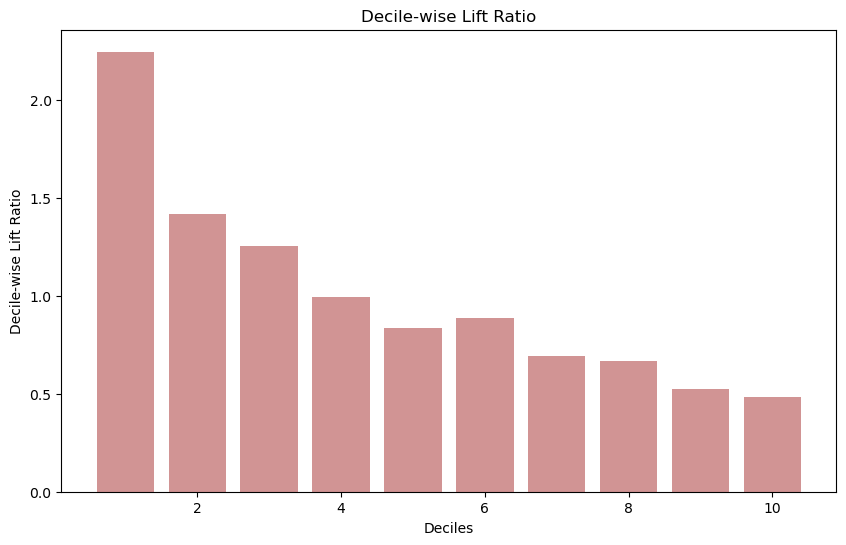

In [95]:
plt.figure(figsize=(10, 6))
plt.bar(df['decile'].unique(), df.groupby('decile')['dec_lift'].mean(), color='brown',alpha =0.5)
plt.xlabel('Deciles')
plt.ylabel('Decile-wise Lift Ratio')
plt.title('Decile-wise Lift Ratio')
plt.show()

